# Trabalho Final de Bases Computacionais da Ciência
 Autor: Alexandre Hiroyuki Yamauchi

 Fonte dos dados: https://www.kaggle.com/datasets/mmattson/who-national-life-expectancy

## 1. Importando bibliotecas e lendo a tabela de dados

In [58]:
import pandas
import math
import numpy as np
import random
import matplotlib.pyplot as plot
%matplotlib inline

# Carrega os dados
df = pandas.read_csv('who_life_exp.csv', sep=',', decimal='.') # 3111 rows × 32 columns

df.head(8)

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN
5,Angola,AGO,Africa,2005,52.72512,15.75107,322.7077,0.109205,0.018945,3.48640,...,2.85220,19433.602,101.3,50.165,1.4,4060.0,NaN,2.12011,NaN,NaN
6,Angola,AGO,Africa,2006,53.82273,15.92263,313.7094,0.103120,0.017360,4.02043,...,2.68554,20149.901,96.2,51.143,1.5,4450.0,NaN,2.28146,NaN,NaN
7,Angola,AGO,Africa,2007,54.97549,16.09804,302.8322,0.096850,0.015920,4.67969,...,2.97439,20905.363,91.0,52.177,1.6,5030.0,NaN,NaN,NaN,NaN


Alternativa para importar o arquivo csv manualmente durante a execução do código:
> Comentado apenas para não interferir na execução do código por completo.

In [3]:
# from google.colab import files
# import io

# file = files.upload()

# df = pandas.read_csv(io.BytesIO(file['who_life_exp.csv']), sep=',', decimal='.')

# df

## 2. Análise dos dados de um país escolhido

Nome do país inválido, tente novamente.
min: 69.8958
max: 75.13705
média: 72.76946882352941
mediana: 73.00681
moda(5 primeiros): 0    69.89580
1    70.36314
2    70.72389
3    71.09914
4    71.37670
Name: life_expect, dtype: float64
amplitude: 5.241250000000008
var: 2.6738648546610304
desvio padrão: 1.6351956625006778
quantidade de anos: 17
percentil 25%: 71.3767 , percentil 75%: 74.04764


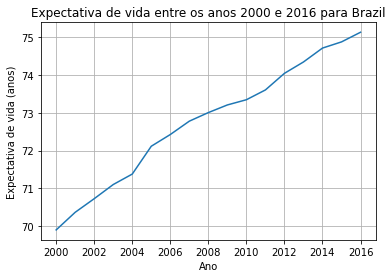

In [55]:
country_input = ''
valid_input = False
while not valid_input:
  country_input = str(input('Digite o nome do país(exemplo: Brazil): '))
  valid_input = country_input in df.country.drop_duplicates().values
  if not valid_input:
    print('Nome do país inválido, tente novamente.')

country_query = df.query(f"country == '{country_input}'")

print('min:', country_query['life_expect'].min())
print('max:', country_query['life_expect'].max())
print('média:', country_query['life_expect'].mean())
print('mediana:', country_query['life_expect'].median())
print('moda(5 primeiros):', country_query['life_expect'].mode().head(5))
amplitude = country_query['life_expect'].max() - country_query['life_expect'].min()
print('amplitude:', amplitude)
print('var:', country_query['life_expect'].var())
print('desvio padrão:', country_query['life_expect'].std())
print('quantidade de anos:', country_query['life_expect'].count())
print('percentil 25%:', np.percentile(country_query['life_expect'], q=25), ', percentil 75%:', np.percentile(country_query['life_expect'], q=75))

print(country_query.groupby('year')['life_expect'])
plot.title('Expectativa de vida entre os anos 2000 e 2016 para ' + country_input)
plot.xlabel('Ano')
plot.ylabel('Expectativa de vida (anos)')
plot.grid()
plot.plot(country_query['year'], country_query['life_expect'])

## 3. Análise da expectativa de vida de todos os países

3042                Japan
2547          Switzerland
2345                Spain
2957            Singapore
2396               France
2770            Australia
2156                Italy
1325               Canada
3093    Republic of Korea
2308              Iceland
Name: country, dtype: object


<AxesSubplot:title={'center':'life_expect'}, xlabel='year'>

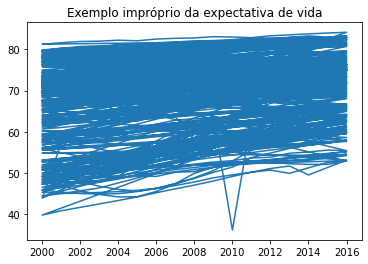

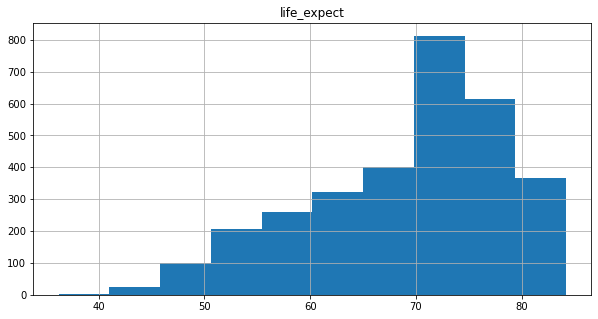

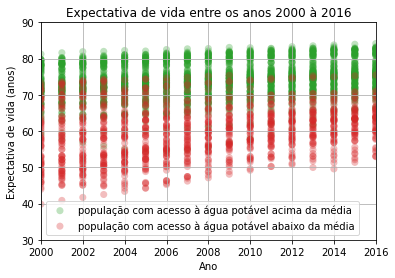

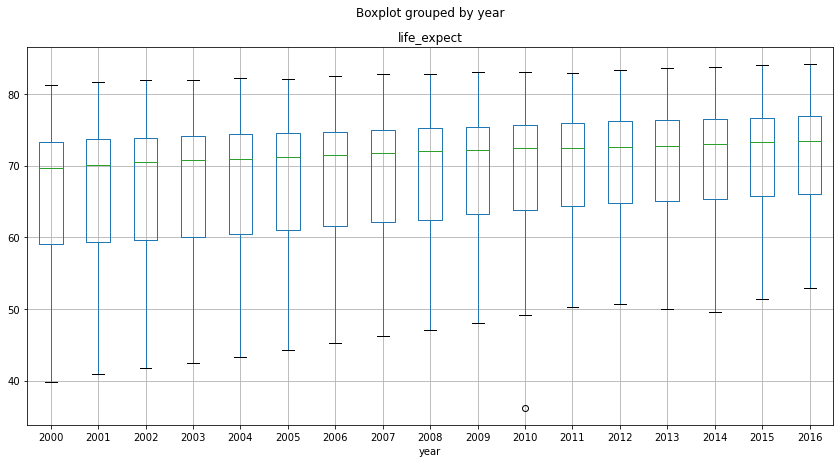

In [5]:
print(df.sort_values(by=['life_expect'], ascending=False)['country'].drop_duplicates().head(10))

plot.title('Exemplo impróprio da expectativa de vida')
plot.plot(df['year'], df['life_expect'])

df.hist(column='life_expect', figsize=(10, 5))

color_relations = [
    ['tab:green', 'basic_water > basic_water.mean()', 'população com acesso à água potável acima da média'],
    ['tab:red', 'basic_water < basic_water.mean()', 'população com acesso à água potável abaixo da média'],
]

fig, ax = plot.subplots()
for i in color_relations:
    scale = 50.0
    selection = df.query(i[1])
    ax.scatter(selection['year'], selection['life_expect'], c=i[0], s=scale, label=i[2],
               alpha=0.3, edgecolors='none')

plot.title('Expectativa de vida entre os anos 2000 à 2016')
plot.xlabel('Ano')
plot.ylabel('Expectativa de vida (anos)')
ax.grid(True)
ax.legend()
ax.axis([2000, 2016, 30, 90])

df.boxplot(column='life_expect', by='year', figsize=(14, 7))

## 4. Análise da correlação entre expectativa de vida e pobreza

c:\Users\alexa\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\alexa\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Mediana da correlação: -0.7648810578517314


array([[<AxesSubplot:title={'center':'corr'}>]], dtype=object)

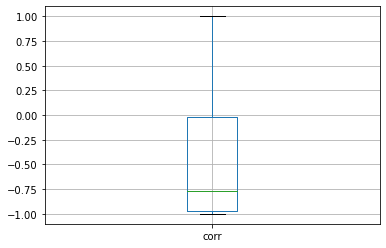

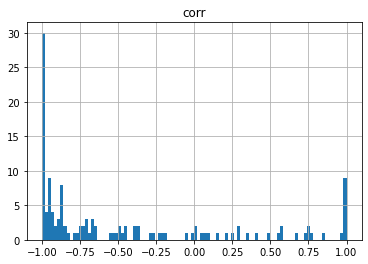

In [37]:
corr_table = []

country_set = df.country.drop_duplicates()

for i in country_set:
  poverty_corr = df[df.country == i]['life_expect'].corr(df[df.country == i]['une_poverty'])
  if(not math.isnan(poverty_corr)):
    corr_table.append(poverty_corr)

aux = pandas.DataFrame(data={'corr': corr_table}, index=range(len(corr_table)))

print('Mediana da correlação:', np.median(corr_table))
aux.boxplot(column='corr')
aux.hist(column='corr', bins=100)

## 5. Modelagem, simulação e previsão da expectativa de vida

Tempo(anos) x Expectativa de vida:
Mediana da correlação: 0.9844010372257785
Coeficiente de determinação: 0.9690454020911886
Predição da expectativa de vida para Brazil em 2017: 75.6635807352942 +- 0.33149916666683055 [anos]
Predição da expectativa de vida para Brazil em 2018: 75.98514872549026 +- 0.33149916666683055 [anos]
Predição da expectativa de vida para Brazil em 2019: 76.30671671568643 +- 0.33149916666683055 [anos]


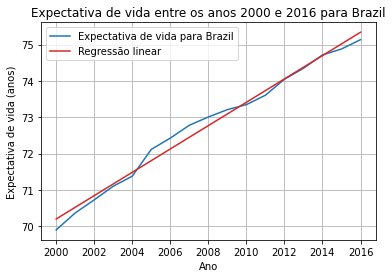

In [89]:
corr_table = []
country_set = df.country.drop_duplicates()

for i in country_set:
  time_corr = df[df.country == i]['year'].corr(df[df.country == i]['life_expect'])
  if(not math.isnan(time_corr)):
    corr_table.append(time_corr)

aux = pandas.DataFrame(data={'corr': corr_table}, index=range(len(corr_table)))

print('Tempo(anos) x Expectativa de vida:')
print('Mediana da correlação:', np.median(corr_table))
print('Coeficiente de determinação:', np.median(corr_table)**2)

country_input = ''
valid_input = False
while not valid_input:
  country_input = str(input('Digite o nome do país(exemplo: Brazil): '))
  valid_input = country_input in df.country.drop_duplicates().values
  if not valid_input: print('Nome do país inválido, tente novamente.')

country_query = df.query(f"country == '{country_input}'")

(a, b) = np.polyfit(x=country_query['year'], y=country_query['life_expect'], deg=1)
x_fit = np.arange(2000, 2017, 1)
y_fit = a * x_fit + b

plot.title('Expectativa de vida entre os anos 2000 e 2016 para ' + country_input)
plot.xlabel('Ano')
plot.ylabel('Expectativa de vida (anos)')
plot.grid()
plot.plot(country_query['year'], country_query['life_expect'], label=f'Expectativa de vida para {country_input}')
plot.plot(x_fit, y_fit, color='tab:red', label='Regressão linear')
plot.legend()

max_error = 0
for i in country_query['year']:
  life_expect_year = country_query[country_query.year == i]['life_expect'].values[0]
  error = abs(life_expect_year - (a * i + b))
  if(error > max_error):
    max_error = error

for i in [2017, 2018, 2019]: 
  print(f'Predição da expectativa de vida para {country_input} em {i}: {a * i + b} +- {max_error} [anos]')

Média do erro aleatório: 1.8345910470143851
Erro da regressão: 0.33149916666683055
Diferença entre os erros: 1.5030918803475546


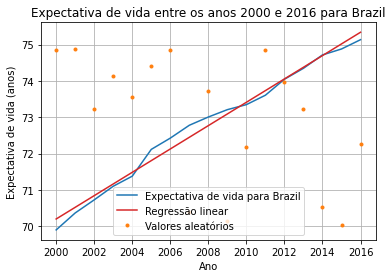

In [88]:
min = country_query['life_expect'].min()
max = country_query['life_expect'].max()

gen_numbers = {}
error_list = []
for i in country_query['year']:
  generated = []
  gen_error = []
  for j in range(0, 100):
    generated.append(random.random() * (max - min) + min)
    gen_error.append(abs(generated[j] - country_query[country_query.year == i]['life_expect'].values[0]))
  gen_numbers[i] = generated
  error_list.append(np.mean(gen_error))

print('Média do erro aleatório:', np.mean(error_list))
print('Erro da regressão:', max_error)
print('Diferença entre os erros:', np.mean(error_list) - max_error)

gen_sample = {}
for i in country_query['year']:
  gen_sample[i] = random.random() * (max - min) + min

plot.title('Expectativa de vida entre os anos 2000 e 2016 para ' + country_input)
plot.xlabel('Ano')
plot.ylabel('Expectativa de vida (anos)')
plot.grid()
plot.plot(country_query['year'], country_query['life_expect'], label=f'Expectativa de vida para {country_input}')
plot.plot(x_fit, y_fit, color='tab:red', label='Regressão linear')
plot.plot(gen_sample.keys(), gen_sample.values(), color='tab:orange', label='Valores aleatórios', marker='.', linestyle='none')
plot.legend()